<a href="https://colab.research.google.com/github/JakubDemeszko/ML_Course/blob/main/Data_Visualization/seaborn02_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Reading the data from AWS link provided by the course, importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/churn_modelling/Telco-Customer-Churn.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Preparing the data for the visualization, changing the Total Charges into float
# and counting the median to fill the missing data with the median
TotalMedian = df[df.TotalCharges != ' ']['TotalCharges'].astype('float32').median()

In [4]:
# Filling the missing data (' ') with the corrected values (median)
# Changing the column data into float
df['TotalCharges'][df['TotalCharges'] == ' '] = TotalMedian
df['TotalCharges'] = df['TotalCharges'].astype('float32')

<ipython-input-4-4deb64291da0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'][df['TotalCharges'] == ' '] = TotalMedian


In [5]:
# Checking the values
df.TotalCharges.value_counts()

1397.475098    11
20.200001      11
19.750000       9
20.049999       8
19.900000       8
               ..
6849.399902     1
692.349976      1
130.149994      1
3211.899902     1
6844.500000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Checking if the df has nan values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Converting the data into categorical

categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
               'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
numerical = ['TotalCharges', 'tenure', 'MonthlyCharges']

for col in categorical:
  df[col] = df[col].astype('category')

for col in numerical:
  df[col] = df[col].astype('float32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   float32 
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [9]:
# Droping the customer ID column
df = df.drop(columns=['customerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   float32 
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

Text(0, 0.5, '')

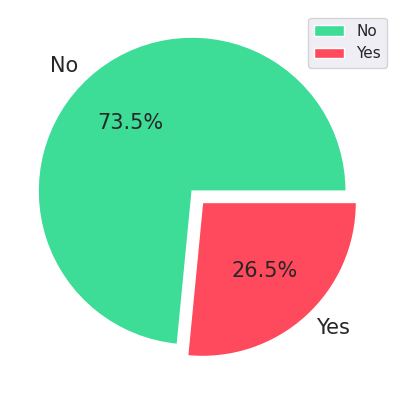

In [21]:
# Calculating the frequency of values and making the chart.
# Customization of the pie chart.
plt.figure(figsize =(5,5))
sns.set()
df.Churn.value_counts().plot(kind = 'pie', fontsize = 15, colors = ['#3DDC97', '#FF495C'],
                             explode = [0.1, 0], autopct = '%1.1f%%')
plt.legend()
plt.ylabel('')

Text(0, 0.5, '')

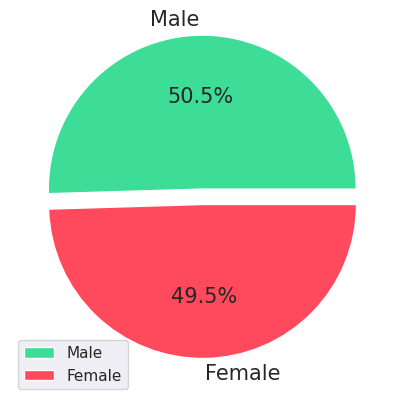

In [22]:
# Creating a pie chart for the gender
plt.figure(figsize =(5,5))
sns.set()
df.gender.value_counts().plot(kind = 'pie', fontsize = 15, colors = ['#3DDC97', '#FF495C'],
                             explode = [0.1, 0], autopct = '%1.1f%%')
plt.legend()
plt.ylabel('')

Text(0, 0.5, '')

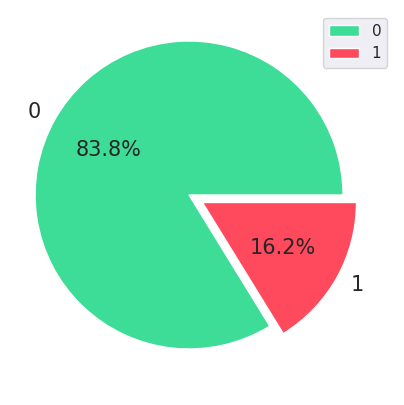

In [23]:
# Making a chart for column.
plt.figure(figsize =(5,5))
sns.set()
df.SeniorCitizen.value_counts().plot(kind = 'pie', fontsize = 15, colors = ['#3DDC97', '#FF495C'],
                             explode = [0.1, 0], autopct = '%1.1f%%')
plt.legend()
plt.ylabel('')

<ipython-input-25-919904d5747d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MonthlyCharges, bins = 30)


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

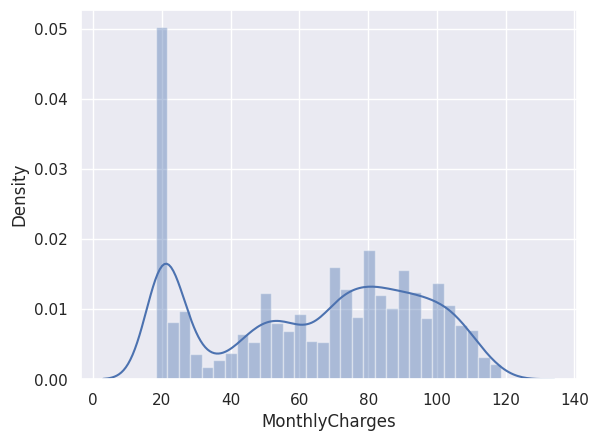

In [25]:
# Making a displot from Monthly Charges
sns.distplot(df.MonthlyCharges, bins = 30)

<ipython-input-26-d154fd3ac35e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure, bins = 30)


<Axes: xlabel='tenure', ylabel='Density'>

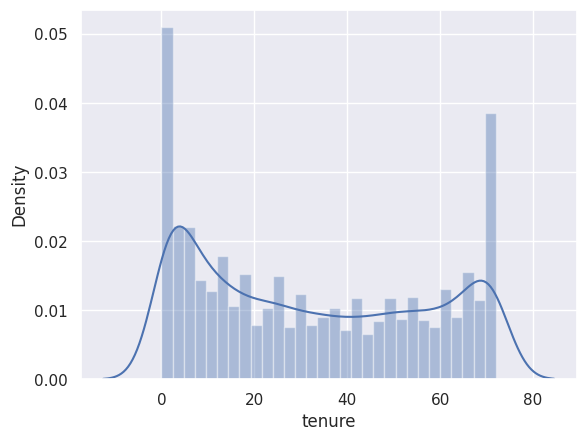

In [26]:
# Making the chart for the customer's tenure
sns.distplot(df.tenure, bins = 30)

<ipython-input-29-49e97ebfa256>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MonthlyCharges, bins = 30, ax = ax[0])
<ipython-input-29-49e97ebfa256>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure, bins = 30, ax=ax[1])


<Axes: xlabel='tenure', ylabel='Density'>

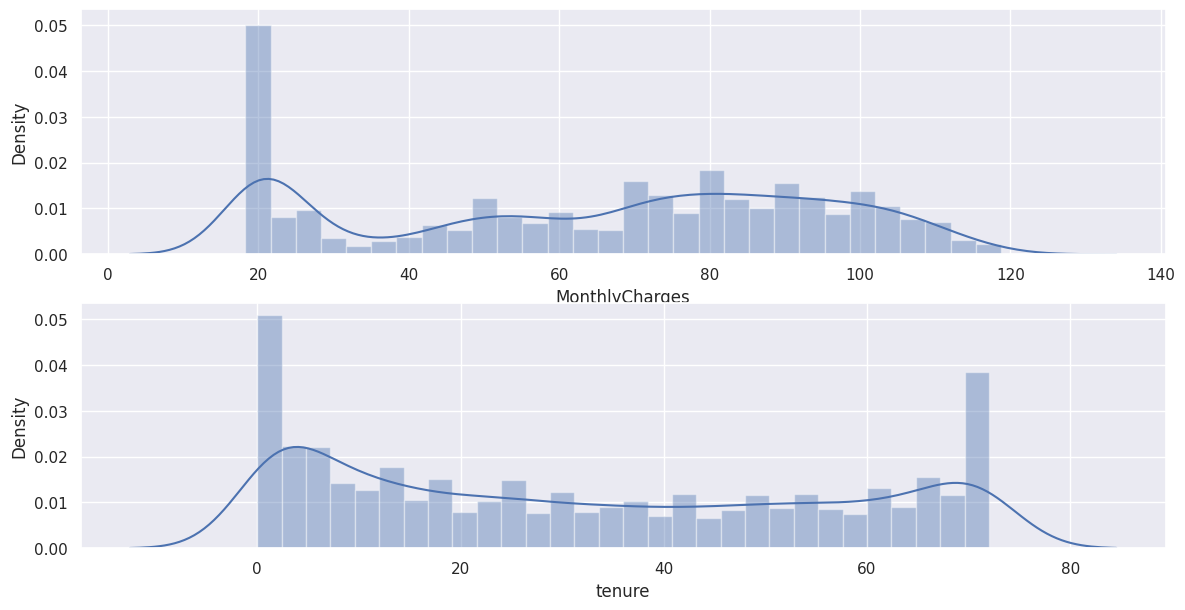

In [29]:
# Using subplots to combine 2 charts.

fig, ax = plt.subplots(nrows = 2, ncols = 1, sharey = True, figsize=(14,7))
sns.distplot(df.MonthlyCharges, bins = 30, ax = ax[0])
sns.distplot(df.tenure, bins = 30, ax=ax[1])

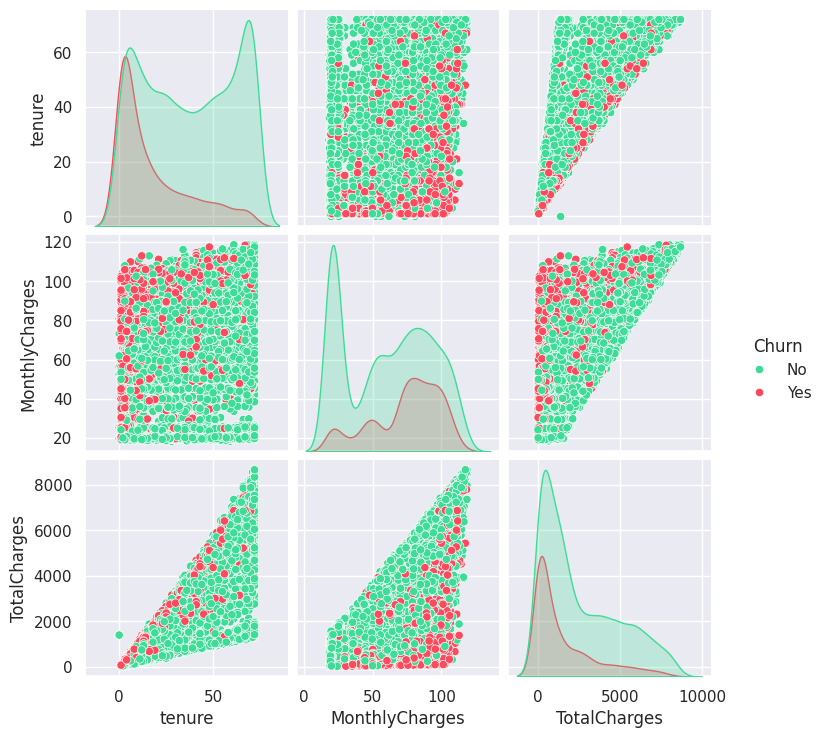

In [33]:
# Using the pairplot

sns.pairplot(data = df, vars =['tenure', 'MonthlyCharges', 'TotalCharges'],
             hue = 'Churn', palette = ['#3DDC97', '#FF495C'])

<ipython-input-35-8b624a815272>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df, x = 'Churn', y = 'MonthlyCharges', kind = 'violin',


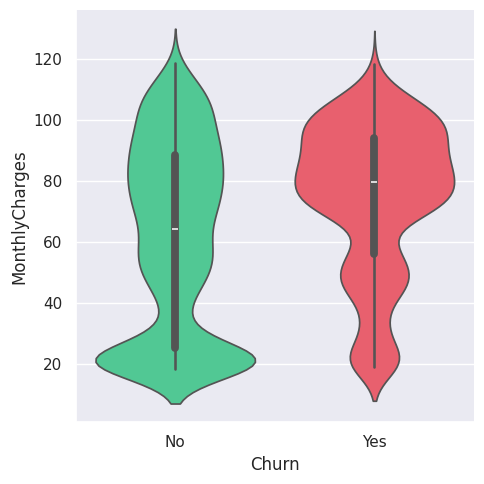

In [35]:
# Using of the catplot
sns.catplot(data = df, x = 'Churn', y = 'MonthlyCharges', kind = 'violin',
            palette = ['#3DDC97', '#FF495C'])

<ipython-input-38-5d5996657442>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

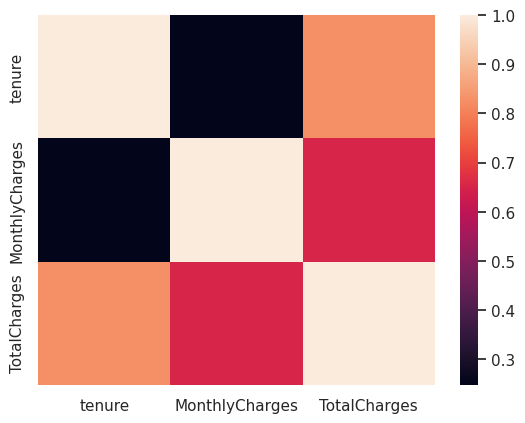

In [38]:
# Making the heatmap to check the correlation

sns.heatmap(df.corr())